<a href="https://colab.research.google.com/github/devashrichaudhari/MLOps-Zoomcamp/blob/main/Assignment_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework: Week-1  
Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page ("Yellow Taxi Trip Records")  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Q1. Downloading the data
We'll use the same NYC taxi dataset "Yellow Taxi Trip Records".

Download the data for January and February 2022.

In [2]:
df_jan = pd.read_parquet('/content/yellow_tripdata_2022-01.parquet')
df_feb = pd.read_parquet('/content/yellow_tripdata_2022-02.parquet')


In [3]:
df_jan.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0


In [4]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [5]:
# Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data

df_jan.shape[1]

19

# Q2. Computing duration
Now let's compute the duration variable. It should contain the duration of a ride in minutes.

In [6]:
# Calculate the trip duration
df_jan['Duration'] = (df_jan['tpep_dropoff_datetime'] - df_jan['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)

In [7]:
df_jan.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000


In [8]:
# Question 2:  Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data
std_dev = np.std(df_jan["Duration"])
std_dev

46.445295712725304

# Q3. Dropping outliers
Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

<Axes: >

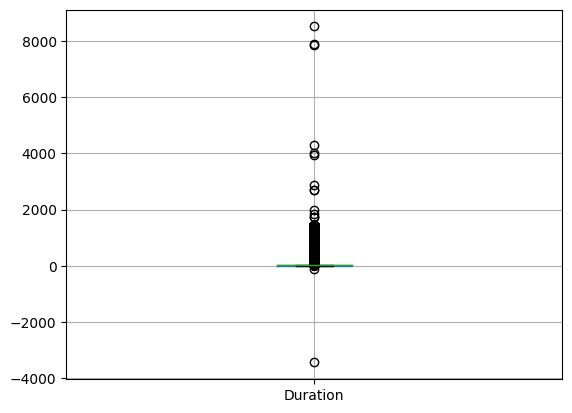

In [9]:
df_jan.boxplot(column='Duration')

In [10]:
df_jan['Duration'].describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: Duration, dtype: float64

In [11]:
df_jan_filtered = df_jan[(df_jan["Duration"] > 1) & (df_jan["Duration"] < 60)]


In [12]:
# Print the number of records left after you dropped the outliers
print(len(df_jan_filtered))

2421030


In [13]:
fraction_of_records_left = (len(df_jan_filtered)/df_jan.shape[0]) * 100
fraction_of_records_left

98.25883922885828

# Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries
Fit a dictionary vectorizer
Get a feature matrix from it


In [14]:
categorical_cols = ['PULocationID', 'DOLocationID']

In [15]:
df_jan = df_jan_filtered[categorical_cols + ['Duration']]

In [16]:
df_jan[categorical_cols] = df_jan[categorical_cols].astype(str)

In [17]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421030 entries, 0 to 2463930
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   PULocationID  object 
 1   DOLocationID  object 
 2   Duration      float64
dtypes: float64(1), object(2)
memory usage: 73.9+ MB


In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
train_dicts = df_jan[categorical_cols].to_dict(orient='records')

In [20]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [21]:
y_train = df_jan['Duration'].values

In [22]:
#What's the dimensionality of this matrix (number of columns)?
X_train.shape

(2421030, 515)

# Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters  
Calculate the RMSE of the model on the training data

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

In [25]:
# Question 5: RMSE on train
rmse = mean_squared_error(y_train, y_pred, squared=False)  # squared = False so this is root MSE (RMSE)
print("RMSE:", rmse)

RMSE: 6.983870768584342


# Q6. Evaluating the model
Now let's apply this model to the validation dataset (February 2022).

Before evaluating model on Validation data let's follow the same preprocessing steps on validation data as well.

In [26]:
def preprocess_data(filename, cat_cols):
    if filename.endswith('.parquet'):
        df = pd.read_parquet(filename)
        df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)
        df = df[(df.Duration >= 1) & (df.Duration <= 60)]
        df[cat_cols] = df[cat_cols].astype(str)
        print(filename, '\n', df.shape) 
        return df

In [27]:
cat_cols = ['PULocationID', 'DOLocationID']

In [28]:
df_jan = preprocess_data('/content/yellow_tripdata_2022-01.parquet', cat_cols)
df_feb = preprocess_data('/content/yellow_tripdata_2022-02.parquet', cat_cols)

/content/yellow_tripdata_2022-01.parquet 
 (2421440, 20)
/content/yellow_tripdata_2022-02.parquet 
 (2918187, 20)


In [29]:
train_dicts = df_jan[cat_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_feb[cat_cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [30]:
y_train = df_jan['Duration'].values
y_val = df_feb['Duration'].values

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [32]:
rmse = mean_squared_error(y_val, y_pred, squared=False)  # squared = False so this is root MSE (RMSE)
print("RMSE:", rmse)

RMSE: 7.78640662117552
